In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.stats

In [2]:
df=pd.read_csv("Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
feature_cols =['Length1','Length2','Length3','Height','Width']
X = df[feature_cols]
y = df.Weight
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

In [6]:
print(linreg.coef_, linreg.intercept_)

[ 80.38246172 -23.91313616 -31.52808371  32.21045103  24.0330976 ] -446.1173994833813


In [7]:
X = sm.add_constant(X_train)
lr=sm.OLS(y_train, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     189.1
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.03e-55
Time:                        13:18:48   Log-Likelihood:                -779.00
No. Observations:                 127   AIC:                             1570.
Df Residuals:                     121   BIC:                             1587.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -446.1174     31.027    -14.378      0.0

In [8]:
st.norm.interval(alpha=0.95, loc=np.mean(y_pred), scale=st.sem(y_pred))

(339.0692839491028, 569.4435175474147)

In [9]:

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
con=mean_confidence_interval(y_pred)
print(con)

(454.2564007482587, 334.3941607190664, 574.118640777451)


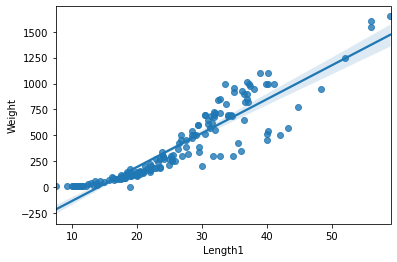

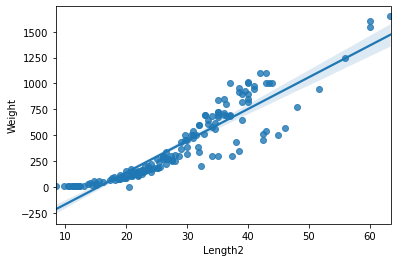

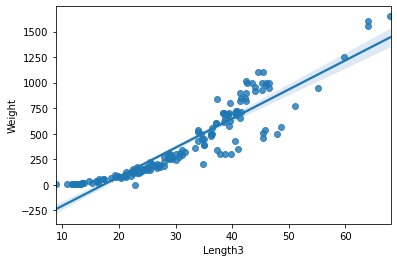

In [10]:
plt.figure()
sns.regplot(x='Length1',y='Weight',data=df)
plt.show()
plt.figure()
sns.regplot(x='Length2',y='Weight',data=df)
plt.show()
plt.figure()
sns.regplot(x='Length3',y='Weight',data=df)
plt.show()

In [11]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [12]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
pred_test_rr= rr.predict(X_test)

In [13]:
print(rr.coef_, rr.intercept_)

[ 80.24886934 -23.78794537 -31.52607403  32.2017528   24.03022179] -446.13896424240227


In [14]:
X = sm.add_constant(X_train)
lr=sm.OLS(y_train, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     189.1
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.03e-55
Time:                        13:18:50   Log-Likelihood:                -779.00
No. Observations:                 127   AIC:                             1570.
Df Residuals:                     121   BIC:                             1587.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -446.1174     31.027    -14.378      0.0

In [15]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)

C:\Users\vatsa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778941.2123210572, tolerance: 1393.9577078740158
  model = cd_fast.enet_coordinate_descent(


In [16]:
print(model_lasso.coef_, model_lasso.intercept_)

[ 69.82132272 -16.40992476 -29.20272806  30.54946512  26.01836309] -448.48922184774517


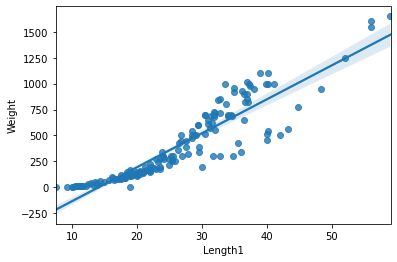

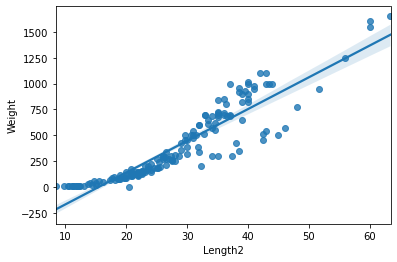

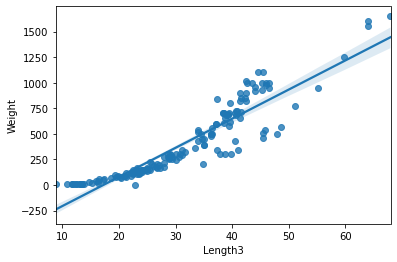

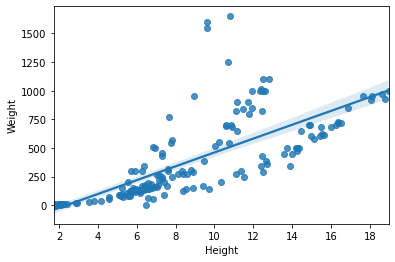

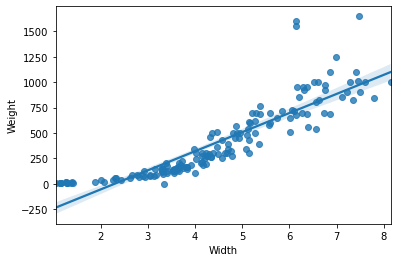

In [17]:
plt.figure()
sns.regplot(x='Length1',y='Weight',data=df)
plt.show()
plt.figure()
sns.regplot(x='Length2',y='Weight',data=df)
plt.show()
plt.figure()
sns.regplot(x='Length3',y='Weight',data=df)
plt.show()
#Graphical representation of relation between height and weight
plt.figure()
sns.regplot(x='Height',y='Weight',data=df)
plt.show()
#Graphical representation of relation between width and weight
plt.figure()
sns.regplot(x='Width',y='Weight',data=df)
plt.show()

In [18]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

iris = datasets.load_iris()

In [19]:
X = iris["data"]  
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", random_state=42)
softmax_reg.fit(X, y)

C:\Users\vatsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [20]:
y_pred=softmax_reg.predict(X)
r2=r2_score(y_pred,y)
print(r2)

0.9607740585774058


In [21]:
softmax_reg = LogisticRegression(multi_class="ovr", random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(multi_class='ovr', random_state=42)

In [22]:
y_pred=softmax_reg.predict(X)
r2=r2_score(y_pred,y)
print(r2)

0.9319992228482611
